### Importación de datos



In [2]:
import matplotlib.pyplot as plt
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


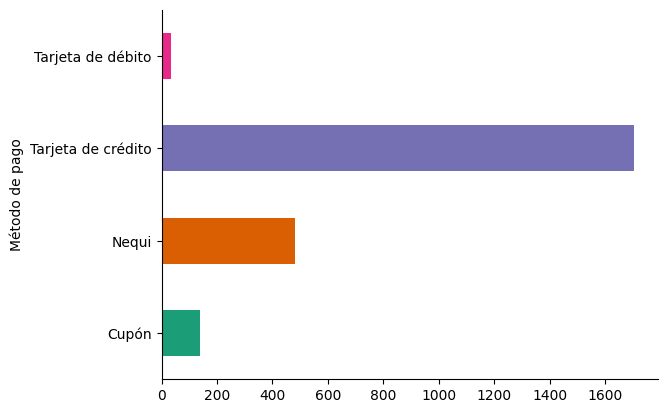

In [73]:
# @title Método de pago

from matplotlib import pyplot as plt
import seaborn as sns
tienda1.groupby('Método de pago').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



Facturación Tienda 1:
     Año 2020: $ 368933200.00
     Año 2021: $ 362120800.00
     Año 2022: $ 316565600.00
     Año 2023: $ 103260800.00
  ---> Total : $ 1150880400.00
  Promedio Mensual: $ 29509753.85
  Promedio Anual  : $ 287720100.00

Facturación Tienda 2:
     Año 2020: $ 320466600.00
     Año 2021: $ 351215500.00
     Año 2022: $ 358226500.00
     Año 2023: $ 86434900.00
  ---> Total : $ 1116343500.00
  Promedio Mensual: $ 28624192.31
  Promedio Anual  : $ 279085875.00

Facturación Tienda 3:
     Año 2020: $ 321707500.00
     Año 2021: $ 362954400.00
     Año 2022: $ 350438300.00
     Año 2023: $ 62919400.00
  ---> Total : $ 1098019600.00
  Promedio Mensual: $ 28154348.72
  Promedio Anual  : $ 274504900.00

Facturación Tienda 4:
     Año 2020: $ 330847700.00
     Año 2021: $ 347823600.00
     Año 2022: $ 302221500.00
     Año 2023: $ 57482900.00
  ---> Total : $ 1038375700.00
  Promedio Mensual: $ 26625017.95
  Promedio Anual  : $ 259593925.00



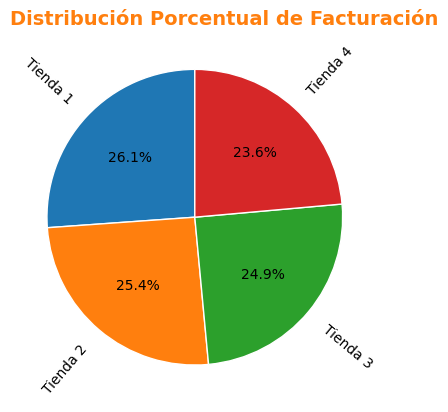

In [71]:
# Análisis de facturación
# agrupar tiendas
tiendas = {'Tienda 1':tienda1, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}
ft = {}
fta = {}
fpm = {}
fpa = {}
for indice_tienda, tienda in tiendas.items():
  print('Facturación ' + indice_tienda + ':')

  # Convertir la columna 'Fecha de Compra' a tipo datetime
  tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

  # Facturación anual, agrupar por año y sumar el precio
  tienda_agrupado_anual = tienda.groupby(pd.Grouper(key='Fecha de Compra', freq='YE'))
  facturacion_anual = tienda_agrupado_anual['Precio'].sum()
  fa = {}
  for periodo, facturacion in facturacion_anual.items():
    anio = periodo.strftime('%Y')
    print(f"     Año {anio}: $ {facturacion:.2f}")
    fadic = {anio:facturacion}
    fa.update(fadic)
  ftadic = {indice_tienda:fa}
  fta.update(ftadic)

  # Facturación total de cada tienda
  facturacion_total = tienda['Precio'].sum()
  print(f"  ---> Total : $ {facturacion_total:.2f}")
  ftdic = {indice_tienda:facturacion_total}
  fpm.update(ftdic)

  # Facturación promedio mensual, agrupar por mes y sumar el precio
  tienda_agrupado_mensual = tienda.groupby(pd.Grouper(key='Fecha de Compra', freq='ME'))
  facturacion_mensual = tienda_agrupado_mensual['Precio'].sum()
  facturacion_promedio_mensual = facturacion_mensual.mean()
  print(f"  Promedio Mensual: $ {facturacion_promedio_mensual:.2f}")
  ftmdic = {indice_tienda:facturacion_promedio_mensual}
  fpm.update(ftmdic)

  # Facturación promedio anual
  facturacion_promedio_anual = facturacion_anual.mean()
  print(f"  Promedio Anual  : $ {facturacion_promedio_anual:.2f}")
  ftadic = {indice_tienda:facturacion_promedio_anual}
  fpa.update(ftadic)
  print()

#print(ft)
#print(fta)
#print(fpm)
#print(fpa)

# graficar distribución porcentual por tienda
nombres = list(fpm.keys())
valores = list(fpm.values())
fig, ax = plt.subplots()
ax.pie(valores, labels=nombres, autopct='%1.1f%%', startangle=90, rotatelabels=True, wedgeprops={"linewidth": 1, "edgecolor": "white"})
ax.set_title('Distribución Porcentual de Facturación', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:orange'})
plt.show()

# 2. Ventas por categoría

Cantidad de Ventas de la Tienda 1:
  Muebles                 :   465
  Electrónicos            :   448
  Juguetes                :   324
  Electrodomésticos       :   312
  Deportes y diversión    :   284
  Instrumentos musicales  :   182
  Libros                  :   173
  Artículos para el hogar :   171
            Total Tienda 1:  2359



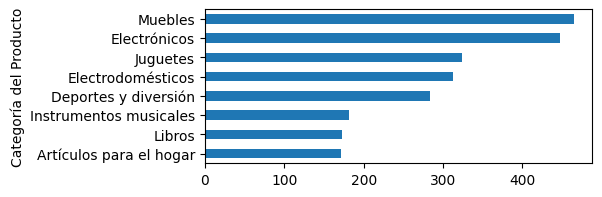


Cantidad de Ventas de la Tienda 2:
  Muebles                 :   442
  Electrónicos            :   422
  Juguetes                :   313
  Electrodomésticos       :   305
  Deportes y diversión    :   275
  Instrumentos musicales  :   224
  Libros                  :   197
  Artículos para el hogar :   181
            Total Tienda 2:  2359



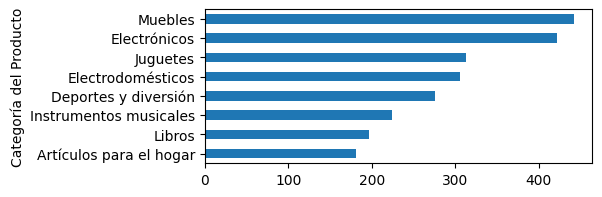


Cantidad de Ventas de la Tienda 3:
  Muebles                 :   499
  Electrónicos            :   451
  Juguetes                :   315
  Electrodomésticos       :   278
  Deportes y diversión    :   277
  Libros                  :   185
  Artículos para el hogar :   177
  Instrumentos musicales  :   177
            Total Tienda 3:  2359



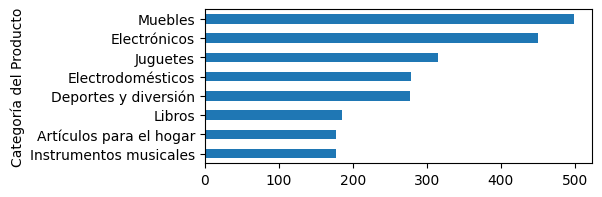


Cantidad de Ventas de la Tienda 4:
  Muebles                 :   480
  Electrónicos            :   451
  Juguetes                :   338
  Deportes y diversión    :   277
  Electrodomésticos       :   254
  Artículos para el hogar :   201
  Libros                  :   187
  Instrumentos musicales  :   170
            Total Tienda 4:  2358



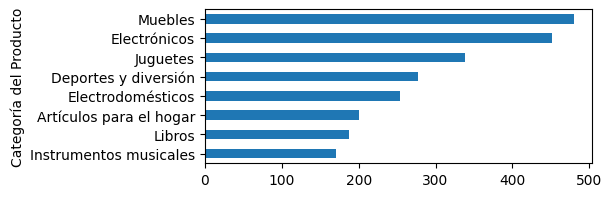

In [51]:
# Ventas por categoría
cct = {}
cctu = {}
for indice_tienda, tienda in tiendas.items():
  print('Cantidad de Ventas de la ' + indice_tienda + ':')

  # agrupar por categoría y obtener cantidad por categoria
  agrupado_por_categoria = tienda.groupby('Categoría del Producto')
  #print(agrupado_por_categoria)
  cantidad = agrupado_por_categoria.size()
  #print(cantidad), print()
  # ordenar descendente
  cantidad = cantidad.sort_values(ascending=False)
  #print(cantidad), print()

  cc = {}
  for cat, cant in cantidad.items():
    print(f"  {cat:<24}: {cant:>5}")
    ccu = {cat:cant}
    cc.update(ccu)
  #print(cc), print(type(cc))

  ct = cantidad.sum()
  total_string = '          Total ' + indice_tienda
  print(f"  {total_string:<24}: {ct:>5}")
  print()

  # graficar barras horizontales
  plt.figure(figsize=(5,2))
  cantidad.plot(kind='barh').invert_yaxis()
  plt.show()
  print()

  # cantidad total de ventas por categoría y por tienda
  cctu = {indice_tienda:cc}
  cct.update(cctu)
  #print(cctu)
#print(cct)

# 3. Calificación promedio de la tienda


Calificación Promedio:
    Tienda 1:  3.98 de 5
    Tienda 2:  4.04 de 5
    Tienda 3:  4.05 de 5
    Tienda 4:  4.00 de 5
{'Tienda 1': np.float64(3.976685036032217), 'Tienda 2': np.float64(4.037303942348453), 'Tienda 3': np.float64(4.048325561678677), 'Tienda 4': np.float64(3.9957591178965224)}


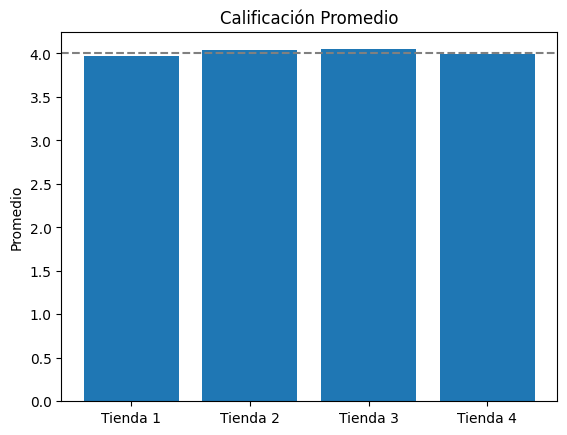

In [47]:
# Calificación promedio de cada tienda
print("Calificación Promedio:")
calp = {}
for indice_tienda, tienda in tiendas.items():
  calificacion_promedio = tienda['Calificación'].mean()
  print(f"    {indice_tienda}:  {calificacion_promedio:.2f} de 5")
  calpdic = {indice_tienda:calificacion_promedio}
  calp.update(calpdic)
print(calp)

# graficar barras verticales
llave = list(calp.keys())
valor = list(calp.values())

plt.bar(llave, valor)
plt.title('Calificación Promedio')
#plt.xlabel('Tiendas')
plt.ylabel('Promedio')
#plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.axhline(y=4, xmin=0.0, xmax=1.0, color = 'gray', linestyle = 'dashed')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Productos más y menos vendidos
for indice_tienda, ccti in cct.items():
  print(indice_tienda + ':')
  pares = list(ccti.items())
  primer_par = pares[0]
  ultimo_par = pares[-1]
  print("  Mas vendido  :", primer_par[0], ' con ', primer_par[1], ' artículos.')
  print("  Menos vendido:", ultimo_par[0], ', ', ultimo_par[1], ' artículos.')
  print()

Tienda 1:
  Mas vendido  : Muebles  con  465  artículos.
  Menos vendido: Artículos para el hogar ,  171  artículos.

Tienda 2:
  Mas vendido  : Muebles  con  442  artículos.
  Menos vendido: Artículos para el hogar ,  181  artículos.

Tienda 3:
  Mas vendido  : Muebles  con  499  artículos.
  Menos vendido: Instrumentos musicales ,  177  artículos.

Tienda 4:
  Mas vendido  : Muebles  con  480  artículos.
  Menos vendido: Instrumentos musicales ,  170  artículos.



# 5. Envío promedio por tienda

In [ ]:
# Costo de envío promedio por tienda
print('Promedio Costo de Envío:')
for indice_tienda, tienda in tiendas.items():

  promedio_costo_envio = tienda['Costo de envío'].mean(skipna=True)
  #print(promedio_costo_envio)
  print(f"  {indice_tienda}: $ {promedio_costo_envio:.2f}")

Promedio Costo de Envío:
  Tienda 1: $ 26018.61
  Tienda 2: $ 25216.24
  Tienda 3: $ 24805.68
  Tienda 4: $ 23459.46


Distribución Geográfica de ventas


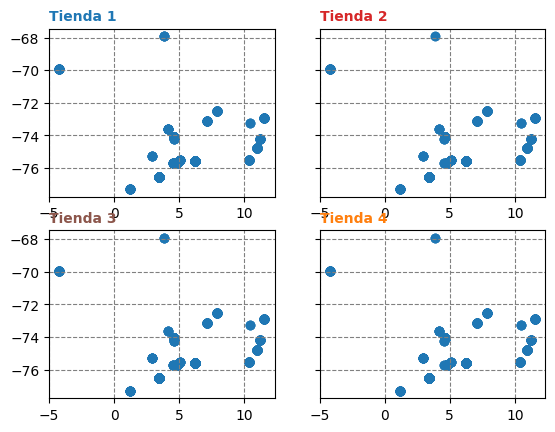

In [68]:
# Grafico Múltiple
print("Distribución Geográfica de ventas")
fig, ax = plt.subplots(2, 2, sharey = True)
ax[0, 0].scatter(x = tienda1['lat'], y = tienda1['lon'])
ax[0, 0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax[0, 0].set_title('Tienda 1', loc = "left", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'tab:blue'})
ax[0, 1].scatter(x = tienda2['lat'], y = tienda2['lon'])
ax[0, 1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax[0, 1].set_title('Tienda 2', loc = "left", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'tab:red'})
ax[1, 0].scatter(x = tienda3['lat'], y = tienda3['lon'])
ax[1, 0].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax[1, 0].set_title('Tienda 3', loc = "left", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'tab:brown'})
ax[1, 1].scatter(x = tienda4['lat'], y = tienda4['lon'])
ax[1, 1].grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax[1, 1].set_title('Tienda 4', loc = "left", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'tab:orange'})
plt.show()

Conclusión:

